K means Clustering is an unsupervised clustering algorithm, which groups unlabelled data into different clusters. Where K represents the number of clusters. 
1. First, we randomly initialize k points, called means or cluster centroids.
2. 
We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far
3. .4. 
We repeat the process for a given number of iterations and at the end, we have our cluster
   s.

## Importing library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = "cc.csv"
data = pd.read_csv(dataset_path)
data = data.drop(columns=['CUST_ID'])
data = data.fillna(data.mean())

data_array = data.to_numpy()

# Define a function to compute the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-means implementation
def kmeans(data_array, k, max_iterations=30):
    # Randomly initialize the centroids
    centroids = data_array[np.random.choice(data_array.shape[0], k, replace=False)]
    
    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.apply_along_axis(lambda x: [euclidean_distance(x, centroid) for centroid in centroids], 1, data_array), axis=1)
        
        # Update centroids by taking the mean of all data points assigned to each cluster
        new_centroids = np.array([data_array[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Function to compute the total within-cluster sum of squares (WCSS)
def compute_wcss(data, centroids, labels):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        wcss += np.sum((cluster_points - centroids[i])**2)
    return wcss

# Elbow method to find the optimal K
def find_optimal_k(data, max_k=10):
    wcss_values = []
    for k in range(1, max_k + 1):
        centroids, labels = kmeans(data, k)
        wcss = compute_wcss(data, centroids, labels)
        wcss_values.append(wcss)
    return wcss_values

# Example usage
wcss = find_optimal_k(data_array, max_k=10)

# Plot the WCSS
# plt.plot(range(1, 11), wcss)
plt.plot(range(1,11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


/home/zinnia/devel/python/python-pip/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zinnia/devel/python/python-pip/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zinnia/devel/python/python-pip/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zinnia/devel/python/python-pip/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

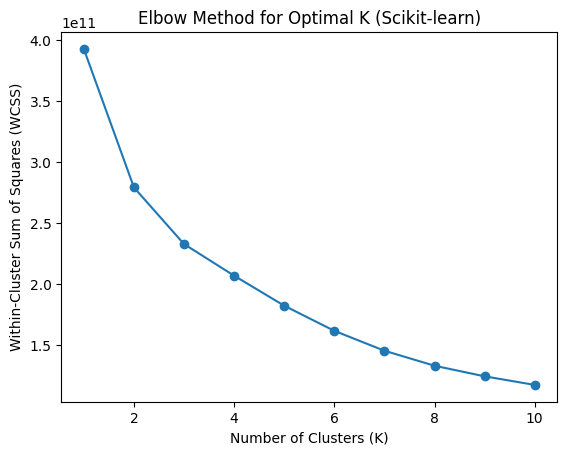

In [5]:
from sklearn.cluster import KMeans
k_values = range(1, 11)
wcss_sk = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_array)
    wcss = kmeans.inertia_
    wcss_sk.append(wcss)
plt.plot(k_values, wcss_sk, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K (Scikit-learn)')
plt.show()
